In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc import MCMC
import seaborn
import corner
import numpy as np
from parmed.topologyobjects import DihedralType
from simtk import unit
from torsionfit.toy_model import ToyModel
import torsionfit.sqlite_plus as db
import corner

Generate toy model that allows continuous phase proposals between 0 and 180 and decouples n

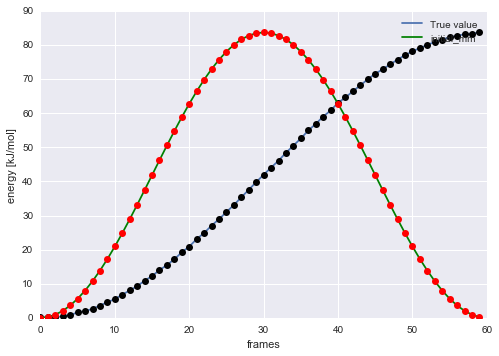

In [2]:
toy = ToyModel(true_value=DihedralType(10, 1, 180, 1, 1), initial_value=DihedralType(10, 2, 180, 1, 1), n_increments=30, 
               continuous=True, decouple_n=True)
plt.plot(toy.synthetic_energy, label='True value')
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='g', label='initial_mm')
plt.plot(toy.scan_set.initial_mm, 'ko', color='r')
plt.legend()

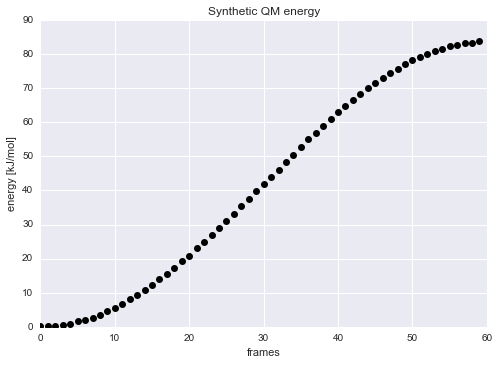

In [3]:
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.title('Synthetic QM energy')
plt.savefig('toy_QM_energy.pdf')

In [4]:
# sample
sampler = MCMC(toy.model.pymc_parameters, db=db, dbname='continuous_decouple_n.sqlite')
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 769.0 sec

In [5]:
print('true value')
print(toy.true_value)
print('initial value')
print(toy.initial_value)
print toy.model.pymc_parameters['CG331_CG321_CG321_CG331_1_K'].value

true value
<DihedralTypes [<DihedralType; phi_k=10.000, per=1, phase=180.000,  scee=1.000, scnb=1.000>]>
initial value
<DihedralType; phi_k=0.107, per=2, phase=4.257,  scee=1.000, scnb=1.000>
10.0108882988


With continuous phase proposals torsionfit gives a good fit. 

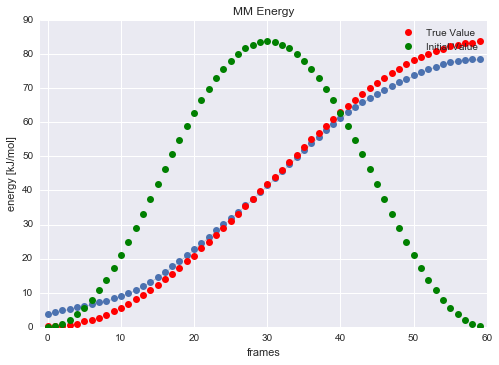

In [6]:
seaborn.tsplot(sampler.trace('mm_energy')[:], interpolate=False)
plt.plot(toy.synthetic_energy, 'o', color='r', label='True Value')
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy.scan_set.initial_mm, 'o', color='g', label='Initial Value')
plt.legend()
plt.savefig('toy_mm_energy_continous.pdf')

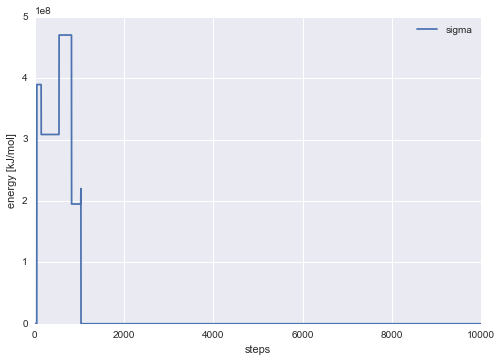

In [7]:
plt.plot(np.exp(sampler.trace('sigma')[9:]), label='sigma')
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')
plt.savefig('sigma_continous.pdf')

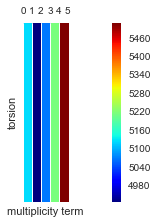

In [9]:
import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, 0, 'random.png')
plt.savefig('multiplicity_continous.pdf')

In [10]:
print('true value')
print(toy.true_value)
print('initial value')
print(toy.initial_value)

true value
<DihedralTypes [<DihedralType; phi_k=10.000, per=1, phase=180.000,  scee=1.000, scnb=1.000>]>
initial value
<DihedralType; phi_k=0.107, per=2, phase=4.257,  scee=1.000, scnb=1.000>


From the traces of each parameters, you can see how the phase slowly moves to 180 as multiplicity 1 truns on and 2 turns off 

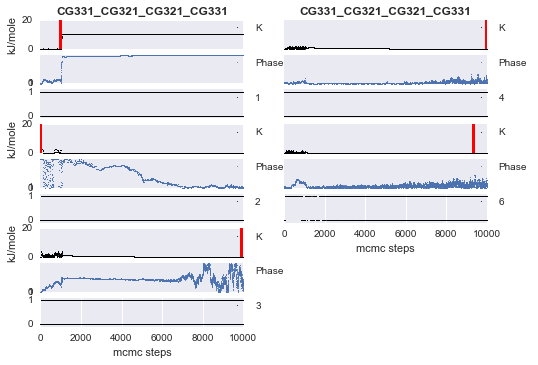

In [11]:
plots.trace_plots('CG331_CG321_CG321_CG331', sampler, markersize=2.0)

(array([  569.,   956.,  1207.,   264.,   316.,   397.,   373.,   166.,
          684.,   156.,   105.,    49.,   311.,   371.,   355.,   409.,
          543.,   311.,   321.,   137.]),
 array([  9.998664 ,  10.0129725,  10.027281 ,  10.0415895,  10.055898 ,
         10.0702065,  10.084515 ,  10.0988235,  10.113132 ,  10.1274405,
         10.141749 ,  10.1560575,  10.170366 ,  10.1846745,  10.198983 ,
         10.2132915,  10.2276   ,  10.2419085,  10.256217 ,  10.2705255,
         10.284834 ]),
 <a list of 20 Patch objects>)

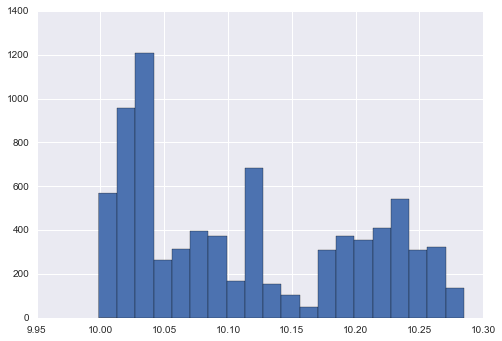

In [30]:
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_1_K')[2000:], bins=20)

(array([  235.,   233.,   177.,   370.,    52.,   101.,   166.,   406.,
          246.,    92.,   217.,   390.,   397.,   847.,   576.,  1202.,
          637.,  1308.,   349.,   899.]),
 array([ 168.87471   ,  169.38174525,  169.8887805 ,  170.39581575,
         170.902851  ,  171.40988625,  171.9169215 ,  172.42395675,
         172.930992  ,  173.43802725,  173.9450625 ,  174.45209775,
         174.959133  ,  175.46616825,  175.9732035 ,  176.48023875,
         176.987274  ,  177.49430925,  178.0013445 ,  178.50837975,
         179.015415  ]),
 <a list of 20 Patch objects>)

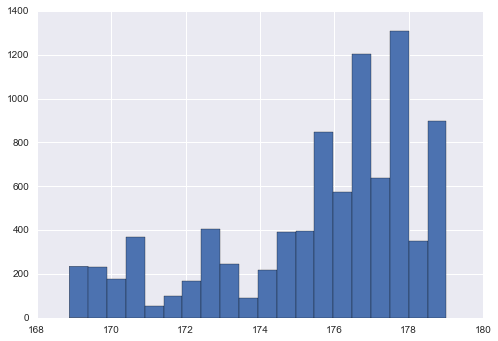

In [29]:
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_1_Phase')[1100:], bins=20)

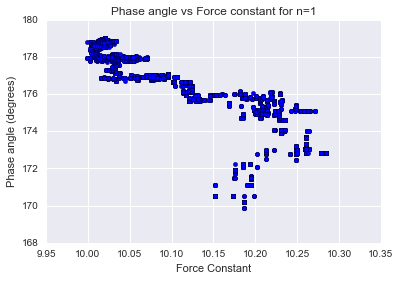

In [41]:
plt.scatter(sampler.trace('CG331_CG321_CG321_CG331_1_K')[2000:],sampler.trace('CG331_CG321_CG321_CG331_1_Phase')[2000:])
plt.ylabel('Phase angle (degrees)')
plt.xlabel('Force Constant')
plt.title('Phase angle vs Force constant for n=1')
plt.savefig('scatter_1.pdf')

In [56]:
data = np.stack((sampler.CG331_CG321_CG321_CG331_1_K.trace[2000:],sampler.CG331_CG321_CG321_CG331_1_Phase.trace[2000:],
                sampler.CG331_CG321_CG321_CG331_2_K.trace[2000:],sampler.CG331_CG321_CG321_CG331_2_Phase.trace[2000:]), axis=1)

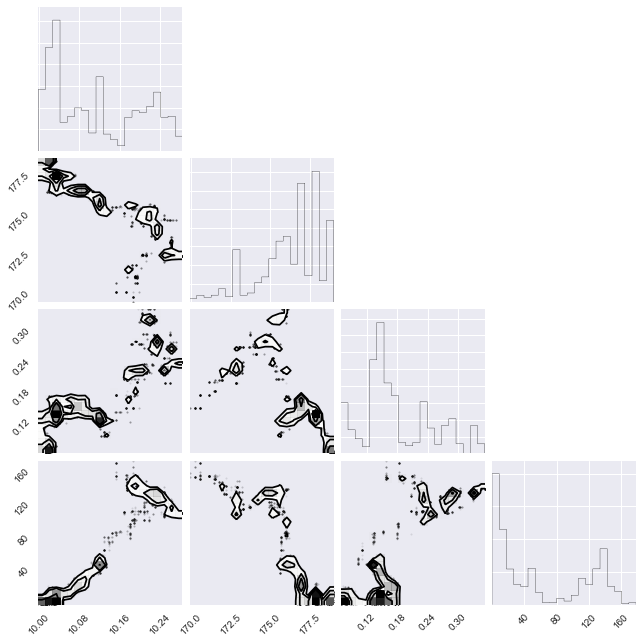

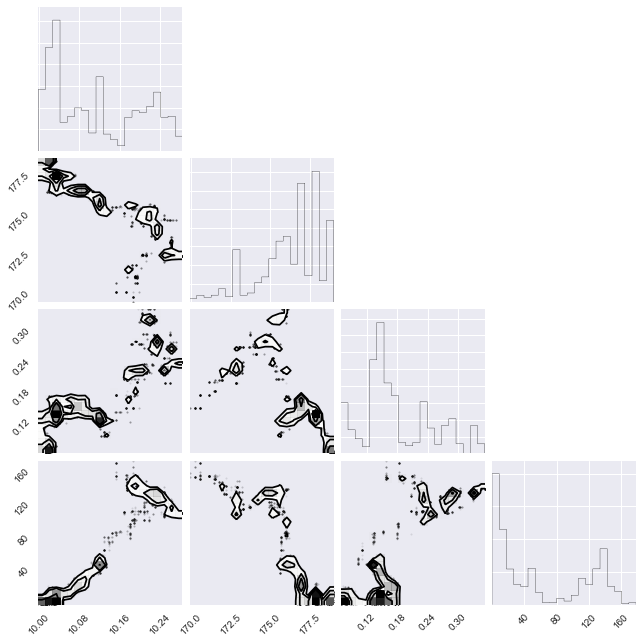

In [57]:
corner.corner(data, plot_countours=False)
